In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Ran\Berkeley\IEOR\290\Project\Data\New Data\newData1.csv')

# 1. Data preprocessing

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Birth Year', 'Gender Flag',
       'Skillset1', 'Skillset1 Weight', 'Skillset2', 'Skillset2 Weight',
       'City of profile', 'Country of profile', 'Education',
       'Elite Institution', 'Start Date', 'End Date', 'Length', 'Role', 'Dept',
       'Location', 'Industry', 'Layoff Date', 'Company Name',
       'Employees Affected', 'laid_off', 'Age'],
      dtype='object')

In [4]:
data = data[data['Industry'] == 'Manufacturing']

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
data = data[data['Industry'] != 'Transportation'] # Too few observations

In [6]:
data['Birth Year'] = data[data['Birth Year'] != 'None']['Birth Year']
data['Birth Year'].unique()

D:\Anaconda\envs\data-x\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


array([1997, 1937, 1980, 1984, 1974, 1958, 1967, 2001, 1992, 1975, 1953,
       1969, 1976, 1962, 1957, 1981, 1972, 1959, 1987, 1988, 1982, 1983,
       1977, 1970, 1965, 1986, 1964, 1932, 1978, 1990, 1973, 1966, 1963,
       1971, 1961, 1985, 1960, 1979, 1991, 1989, 1968, 1954, 1955, 1943,
       1949, 1947, 1948, 1956, 1931, 1994, 1952, 1995, 1930, 1993, 1941,
       1996, 1950, 1951, 1946, 1936, 1945, 1934, 1944, 1940, 1926, 1935,
       1942], dtype=int64)

In [7]:
data = data[~data['Birth Year'].isnull()] #Drops nan
data['Age'] = 2018 - data['Birth Year'].astype('int')

In [8]:
data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
                                             include_lowest=True, 
                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
                                             include_lowest=True, 
                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])

#data['Length'] = data['Length'].astype('int')

In [9]:
data.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Length,Role,Dept,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off,Age
0,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,10/23/2015,"Western Digital Technologies, Inc.",56,0,>45 yrs old
1,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,10/24/2016,"Western Digital Technologies, Inc.",59,0,>45 yrs old
2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,6/17/2016,"Western Digital Technologies, Inc.",71,0,>45 yrs old
3,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,7/3/2016,"Western Digital Technologies, Inc.",337,0,>45 yrs old
4,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,male,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,Bachelors,...,<6mo,?,NaN,"milpitas, ca",Manufacturing,8/27/2018,"Western Digital Technologies, Inc.",79,0,>45 yrs old


In [10]:
threshold = 5  # Remove items less than or equal to threshold
for col in data[data.columns.difference(['Age', 'Length'])]: #Cannot apply this to categorized features
    vc = data[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data[col].loc[data[col].isin(vals_to_remove)] = 0
    

D:\Anaconda\envs\data-x\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# 2. Overview of Lay off in bay area

### Different features' layoff ratio

<Figure size 432x288 with 0 Axes>

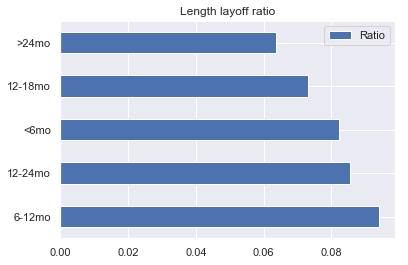

<Figure size 432x288 with 0 Axes>

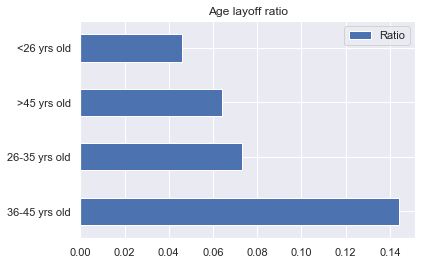

<Figure size 432x288 with 0 Axes>

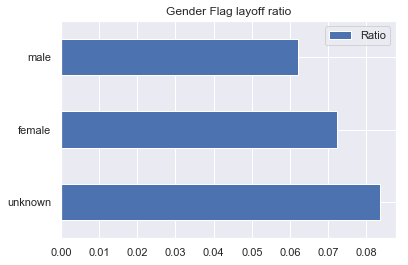

<Figure size 432x288 with 0 Axes>

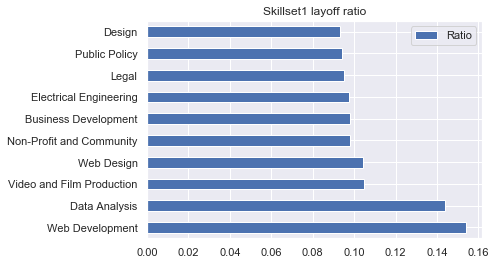

<Figure size 432x288 with 0 Axes>

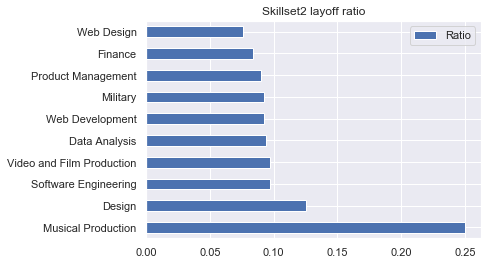

<Figure size 432x288 with 0 Axes>

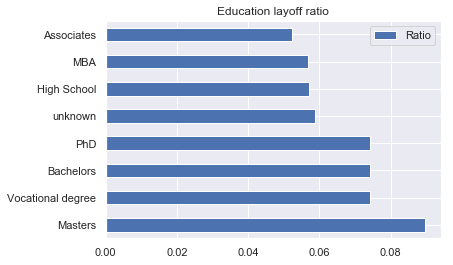

<Figure size 432x288 with 0 Axes>

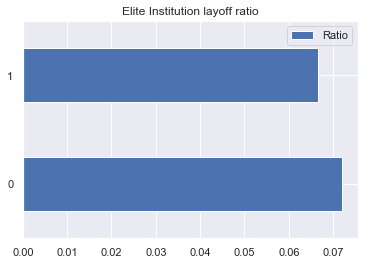

<Figure size 432x288 with 0 Axes>

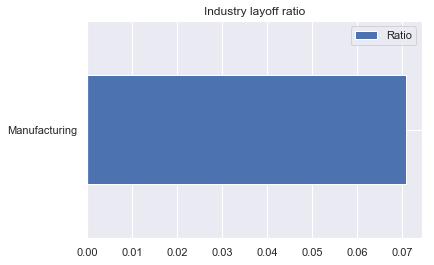

In [11]:
sns.set()
laid_off = data[data['laid_off'] == 1]

features = ['Length', 'Age', 'Gender Flag', 'Skillset1', 'Skillset2', 'Education', 'Elite Institution', 'Industry']

for feature in features:  
    laid_off_ratio = laid_off[feature].value_counts()/data[feature].value_counts()
    laid_off_ratio = pd.DataFrame(laid_off_ratio).rename(columns={feature: "Ratio"}).sort_values(by = 'Ratio', ascending = False)[:10]
    plt.figure()
    laid_off_ratio.plot.barh()
    plt.title(feature + ' layoff ratio')

### key findings:
#### - No significant observed correlation between length and ratio
#### - 36-45 yrs old most vulnerable， followed by 26-35 yrs old
#### - No obvious difference in gender 
#### - Elite has slightly higher ratio
#### - Employees equipped with skillsets Video Production, Video&Film production, and Data Analysis are more vulnerable
#### - Masters has the highest layoff ratio while MBA has one of the lowest

## 3. Time Series Analysis

### 3.1 Number of layoff events

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

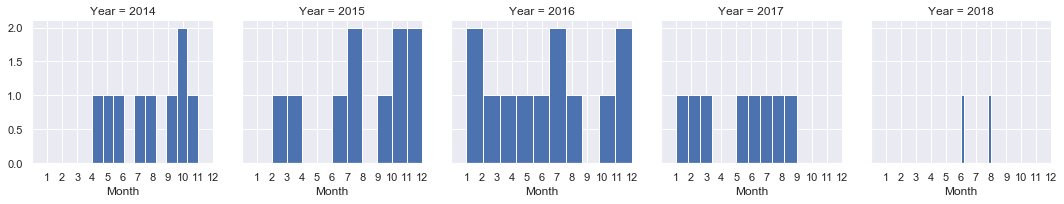

In [12]:
df = data.drop_duplicates('Layoff Date')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date'],errors='coerce')
df['Year'] = df['Layoff Date'].dt.year.astype('int64')
df['Month'] = df['Layoff Date'].dt.month.astype('int64')
df['Day'] = df['Layoff Date'].dt.day.astype('int64')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date']).astype('datetime64')
g = sns.FacetGrid(df, col = 'Year')
g.map(plt.hist,'Month').set(xlim=(0,12),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

### key findings:
#### - Layoff events were more common in 2015, 2016 and 2017: 10 months in a year occurred layoff events
#### - Layoff events are more likely to happen in the early months and late months of a year

### Layoff events scale

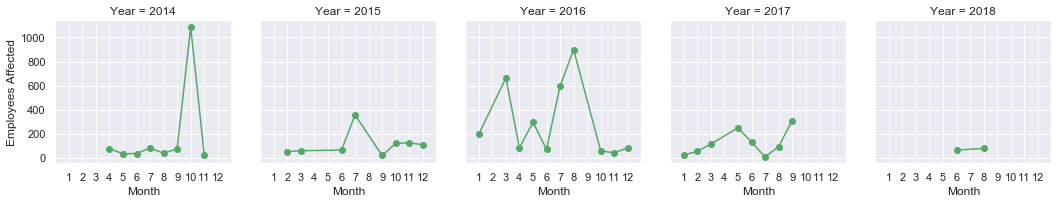

In [13]:
grouped = df.groupby(['Year','Month'])
laid_off_scale = grouped['Employees Affected'].sum()
laid_off_scale = laid_off_scale.reset_index() 
g = sns.FacetGrid(laid_off_scale, col = 'Year')
g.map(plt.plot,'Month','Employees Affected',color = 'g',marker ='o').set(xlim=(0,13),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

### key findings:
#### - 2016 occurred mass layoffs most frequently

In [14]:
# split date
data['Layoff Date'] = pd.to_datetime(data['Layoff Date']).dt.to_period('M')
laid_off['Layoff Date'] = pd.to_datetime(laid_off['Layoff Date']).dt.to_period('M')

unique_months = data['Layoff Date'].sort_values().unique()
unique_months = unique_months[1:] #Remove 1970-01
unique_months

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<PeriodArray>
['2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
 '2015-02', '2015-03', '2015-06', '2015-07', '2015-09', '2015-10', '2015-11',
 '2015-12', '2016-01', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
 '2016-08', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2018-06', '2018-08']
Length: 35, dtype: period[M]

### Skillset1

In [15]:
ratio_s1 = []#skillset1

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset1'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset1'].value_counts()
    ratio = ratio.dropna()
    
    ratio_s1.append(ratio)

In [16]:
ratio_s1# list of series by month

[Human Resources                         0.500000
 Manufacturing and Process Management    0.142857
 Operations Management                   0.142857
 Product Management                      0.066667
 Sales                                   0.030769
 Software Engineering                    0.071429
 Web Development                         0.333333
 Name: Skillset1, dtype: float64,
 Design                                  1.000000
 Manufacturing and Process Management    0.142857
 Product Management                      0.066667
 Sales                                   0.030769
 Software Engineering                    0.071429
 Web Development                         0.333333
 Name: Skillset1, dtype: float64,
 Design                      1.000000
 Non-Profit and Community    1.000000
 Sales                       0.015873
 Name: Skillset1, dtype: float64,
 Non-Profit and Community    1.0
 Name: Skillset1, dtype: float64,
 Business Development         1.000000
 Data Analysis              

In [17]:
s1 = data['Skillset1'].value_counts()[0:9].index
ts_ratio_s1 = {}
for skill in s1:
    ts_ratio_s1[skill] = []
    
for month in range(len(ratio_s1)):
    for skill in s1:        
        if skill in ratio_s1[month].index:
            ts_ratio_s1[skill].append(ratio_s1[month][ratio_s1[month].index == skill].item())
        else:
            ts_ratio_s1[skill].append(0)

In [18]:
ts_ratio_s1

{'Sales': [0.03076923076923077,
  0.03076923076923077,
  0.015873015873015872,
  0,
  0.125,
  0.0771513353115727,
  0.03125,
  0.016129032258064516,
  0,
  0.031746031746031744,
  0.05517241379310345,
  0.05733558178752108,
  0.05154639175257732,
  0.06208053691275168,
  0.15625,
  0.10245310245310245,
  0,
  0.034904013961605584,
  0.07246376811594203,
  0.1,
  0.05102040816326531,
  0.07142857142857142,
  0.1891891891891892,
  0.03372681281618887,
  0.03663003663003663,
  0.06785137318255251,
  0.026022304832713755,
  0.016863406408094434,
  0.02364864864864865,
  0.030303030303030304,
  0.028523489932885907,
  0.01893939393939394,
  0.02023608768971332,
  0.0037313432835820895,
  0.09090909090909091],
 'Software Engineering': [0.07142857142857142,
  0.07142857142857142,
  0,
  0,
  0.1875,
  0.12529550827423167,
  0.034482758620689655,
  0.09375,
  0.06666666666666667,
  0.03333333333333333,
  0.09142857142857143,
  0.08831168831168831,
  0.06818181818181818,
  0.0712401055408971,


In [19]:
ts_ratio_s1 = pd.DataFrame.from_dict(ts_ratio_s1)
ts_ratio_s1['time'] = unique_months

In [20]:
ts_ratio_s1 = ts_ratio_s1.melt('time', var_name = 'Skillset1', value_name = 'ratio')
ts_ratio_s1.head()

,time,Skillset1,ratio
0,2014-05,Sales,0.030769
1,2014-06,Sales,0.030769
2,2014-07,Sales,0.015873
3,2014-08,Sales,0.000000
4,2014-09,Sales,0.125000


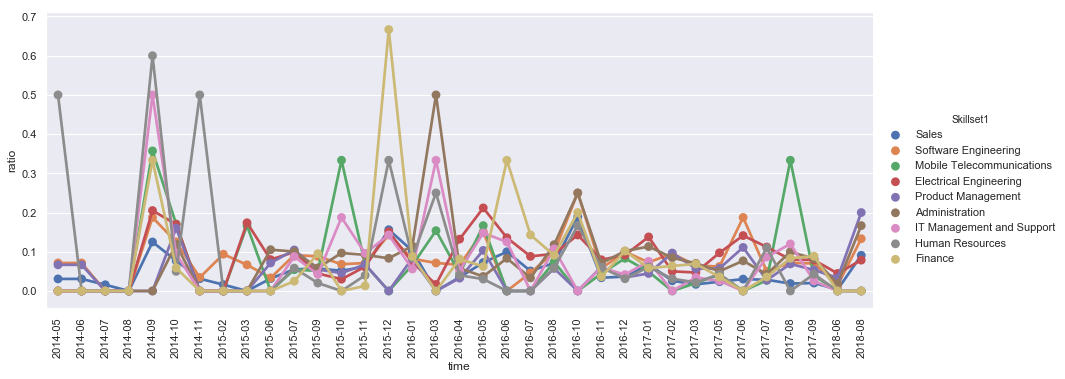

In [21]:
g = sns.catplot(x = 'time', y = 'ratio', hue = 'Skillset1', data = ts_ratio_s1, kind = 'point', aspect = 2.5)
g.set_xticklabels(rotation=90)

### Skillset2

In [22]:
ratio_s2 = []#skillset2

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset2'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset2'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_s2.append(ratio)

In [23]:
s2 = data['Skillset2'].value_counts()[0:9].index
ts_ratio_s2 = {}
for skill in s2:
    ts_ratio_s2[skill] = []
    
for month in range(len(ratio_s2)):
    for skill in s2:        
        if skill in ratio_s2[month].index:
            ts_ratio_s2[skill].append(ratio_s2[month][ratio_s2[month].index == skill].item())
        else:
            ts_ratio_s2[skill].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


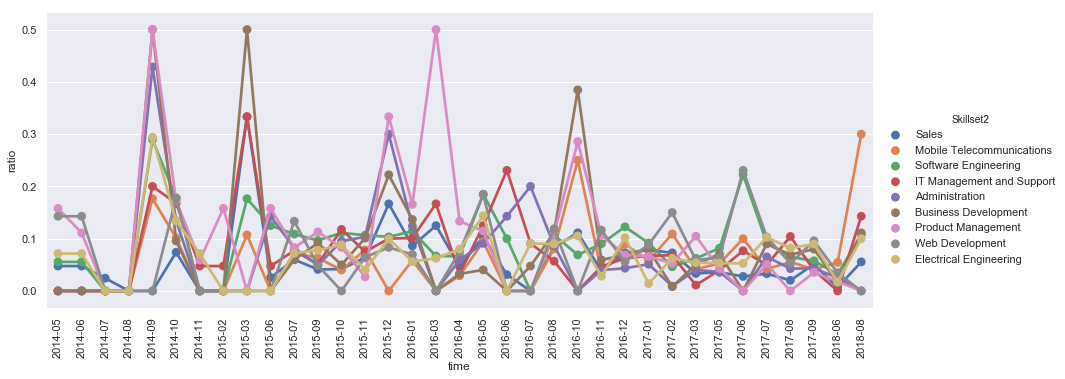

In [24]:
ts_ratio_s2 = pd.DataFrame.from_dict(ts_ratio_s2)
ts_ratio_s2['time'] = unique_months

ts_ratio_s2 = ts_ratio_s2.melt('time', var_name = 'Skillset2', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Skillset2', data = ts_ratio_s2, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - due to the imbalance of sample size (the number of employees with sepecific skillset is very small like public policy while some skillset is much bigger), some skillsets get 100% laid off ratio

### Length of Employment

In [25]:
ratio_length = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Length'].value_counts()/\
    data[data['Layoff Date'] == month]['Length'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_length.append(ratio)

In [26]:
lengths = data['Length'].unique()
ts_ratio_length = {}

for length in lengths:
    ts_ratio_length[length] = []
    
for month in range(len(ratio_length)):
    for length in lengths:        
        if length in ratio_length[month].index:
            ts_ratio_length[length].append(ratio_length[month][ratio_length[month].index == length].item())
        else:
            ts_ratio_length[length].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


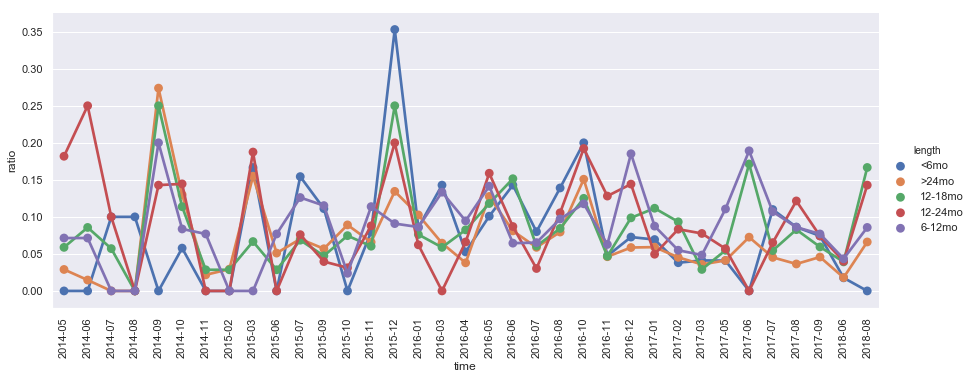

In [27]:
ts_ratio_length = pd.DataFrame.from_dict(ts_ratio_length)
ts_ratio_length['time'] = unique_months

ts_ratio_length = ts_ratio_length.melt('time', var_name = 'length', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'length', data = ts_ratio_length, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, employees stayed at a company for 12-24 months

### Gender

In [28]:
ratio_gender = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Gender Flag'].value_counts()/\
    data[data['Layoff Date'] == month]['Gender Flag'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_gender.append(ratio)

In [29]:
genders = data['Gender Flag'].unique()
ts_ratio_gender = {}

for g in genders:
    ts_ratio_gender[g] = []
    
for month in range(len(ratio_gender)):
    for g in genders:        
        if g in ratio_gender[month].index:
            ts_ratio_gender[g].append(ratio_gender[month][ratio_gender[month].index == g].item())
        else:
            ts_ratio_gender[g].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


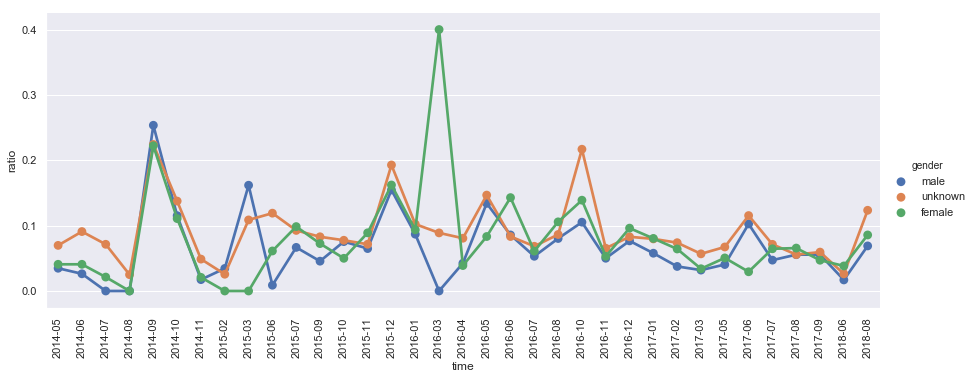

In [30]:
ts_ratio_gender = pd.DataFrame.from_dict(ts_ratio_gender)
ts_ratio_gender['time'] = unique_months

ts_ratio_gender = ts_ratio_gender.melt('time', var_name = 'gender', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'gender', data = ts_ratio_gender, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, female employees had lower laidoff ratio than male

### Age

In [31]:
ratio_age = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Age'].value_counts()/\
    data[data['Layoff Date'] == month]['Age'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_age.append(ratio)

In [32]:
age = data['Age'].unique()
ts_ratio_age = {}

for a in age:
    ts_ratio_age[a] = []
    
for month in range(len(ratio_age)):
    for a in age:        
        if a in ratio_age[month].index:
            ts_ratio_age[a].append(ratio_age[month][ratio_age[month].index == a].item())
        else:
            ts_ratio_age[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


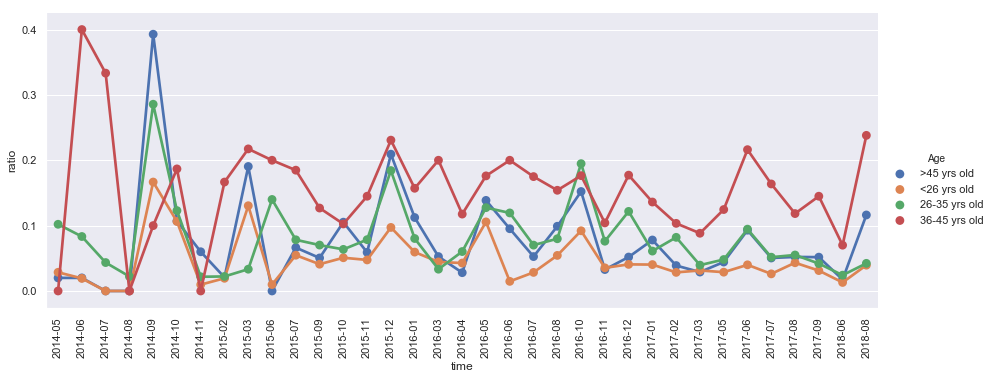

In [33]:
ts_ratio_age = pd.DataFrame.from_dict(ts_ratio_age)
ts_ratio_age['time'] = unique_months

ts_ratio_age = ts_ratio_age.melt('time', var_name = 'Age', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Age', data = ts_ratio_age, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, 36-45 years old employees are most vulnerable while those <26 years old are least vulnerable

### Elite instituion

In [34]:
ratio_elite = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Elite Institution'].value_counts()/\
    data[data['Layoff Date'] == month]['Elite Institution'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_elite.append(ratio)

In [35]:
elite = data['Elite Institution'].unique()
ts_ratio_elite = {}

for a in elite:
    ts_ratio_elite[a] = []
    
for month in range(len(ratio_elite)):
    for a in elite:        
        if a in ratio_elite[month].index:
            ts_ratio_elite[a].append(ratio_elite[month][ratio_elite[month].index == a].item())
        else:
            ts_ratio_elite[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


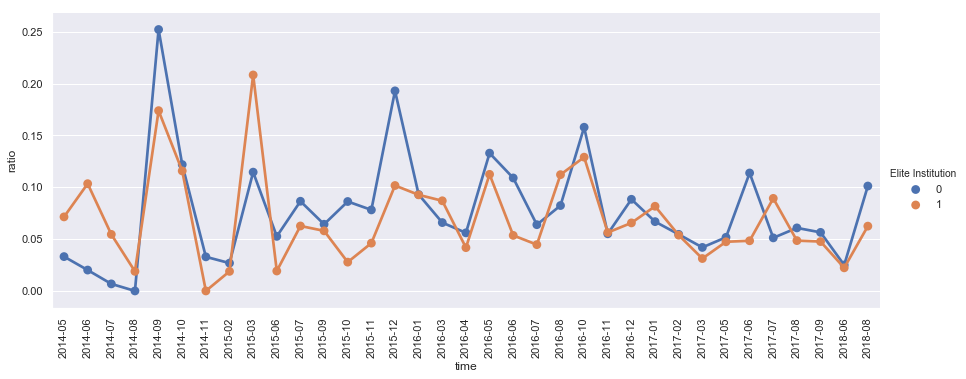

In [36]:
ts_ratio_elite = pd.DataFrame.from_dict(ts_ratio_elite)
ts_ratio_elite['time'] = unique_months

ts_ratio_elite = ts_ratio_elite.melt('time', var_name = 'Elite Institution', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Elite Institution', data = ts_ratio_elite, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - Non Elite institution seems more  vulnerable 

### Education

In [37]:
ratio_edu = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Education'].value_counts()/\
    data[data['Layoff Date'] == month]['Education'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_edu.append(ratio)

In [38]:
edu = data['Education'].unique()
ts_ratio_edu = {}

for a in edu:
    ts_ratio_edu[a] = []
    
for month in range(len(ratio_edu)):
    for a in edu:        
        if a in ratio_edu[month].index:
            ts_ratio_edu[a].append(ratio_edu[month][ratio_edu[month].index == a].item())
        else:
            ts_ratio_edu[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


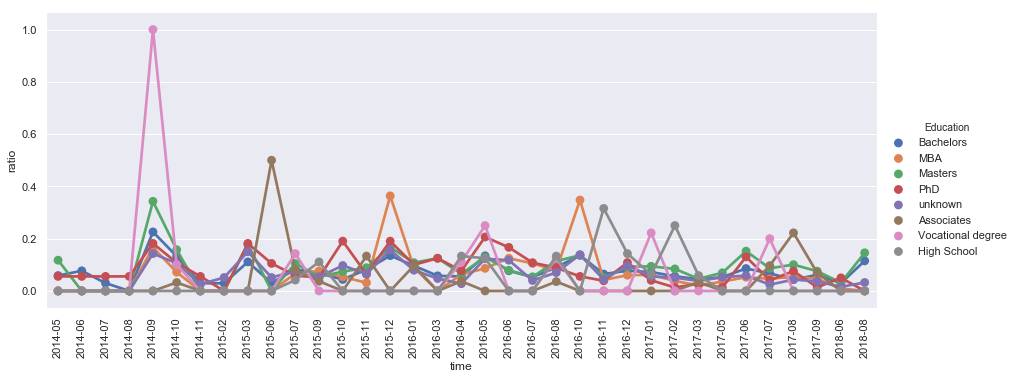

In [39]:
ts_ratio_edu= pd.DataFrame.from_dict(ts_ratio_edu)
ts_ratio_edu['time'] = unique_months

ts_ratio_edu = ts_ratio_edu.melt('time', var_name = 'Education', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Education', data = ts_ratio_edu, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - High school, master and associate are most vulnerable

### Industry

In [40]:
ratio_indus = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Industry'].value_counts()/\
    data[data['Layoff Date'] == month]['Industry'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_indus.append(ratio)

In [41]:
indus = data['Industry'].unique()
ts_ratio_indus = {}

for a in indus:
    ts_ratio_indus[a] = []
    
for month in range(len(ratio_indus)):
    for a in indus:        
        if a in ratio_indus[month].index:
            ts_ratio_indus[a].append(ratio_indus[month][ratio_indus[month].index == a].item())
        else:
            ts_ratio_indus[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


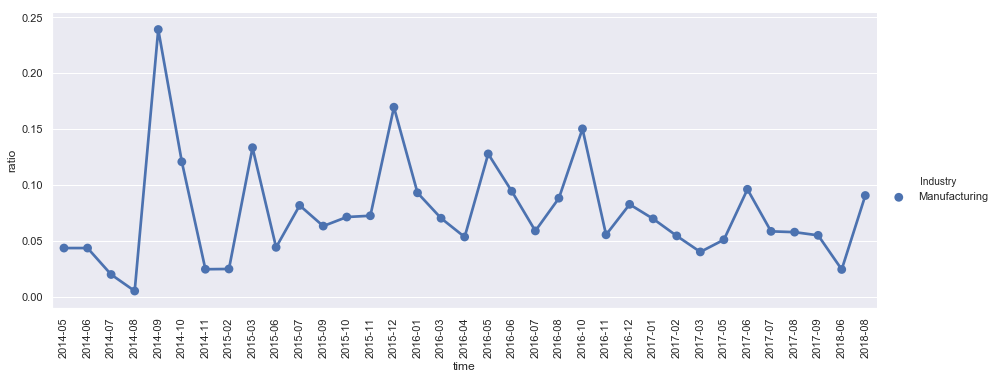

In [42]:
ts_ratio_indus= pd.DataFrame.from_dict(ts_ratio_indus)
ts_ratio_indus['time'] = unique_months

ts_ratio_indus = ts_ratio_indus.melt('time', var_name = 'Industry', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Industry', data = ts_ratio_indus, aspect = 2.5)
g.set_xticklabels(rotation=90)